## Run VMSI pipeline for synthetically generated image

Import required modules

In [1]:
import numpy as np
from src.VMSI import *
from src.segment import Segmenter
import skimage
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sns
import os


### One-step processing and inference

First, load the segmented image.

In [2]:
curr_wd = os.getcwd()
img = skimage.io.imread(f'{curr_wd}/../example_data/synthetic/test.tiff')

Next, process labelled image and run force inference in one step. This creates an object containing morphological and mechanical metrics for each cell, and tension for each cell-cell junction.

In [3]:
vmsi_model = run_VMSI(img)

### Output

#### Plotting results

Once inference is complete, we can use the `plot()` method to visualise
the results. Three quantities can be plotted: the cell pressure, cell-cell
junction tension and cell stress tensor.

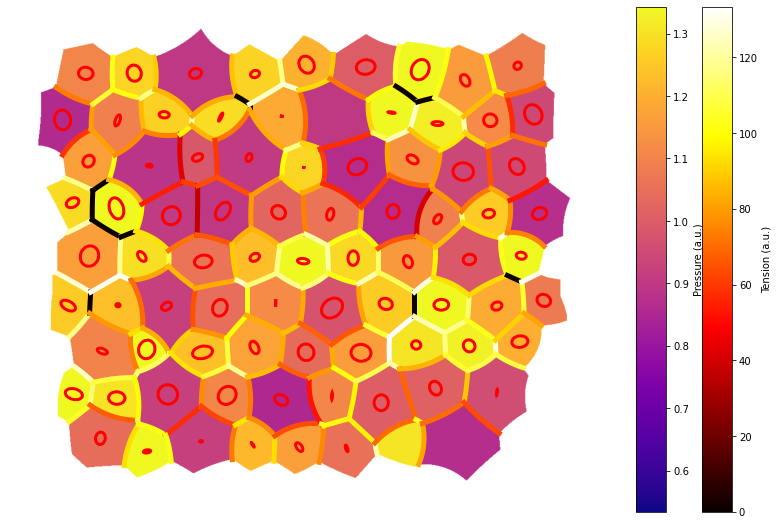

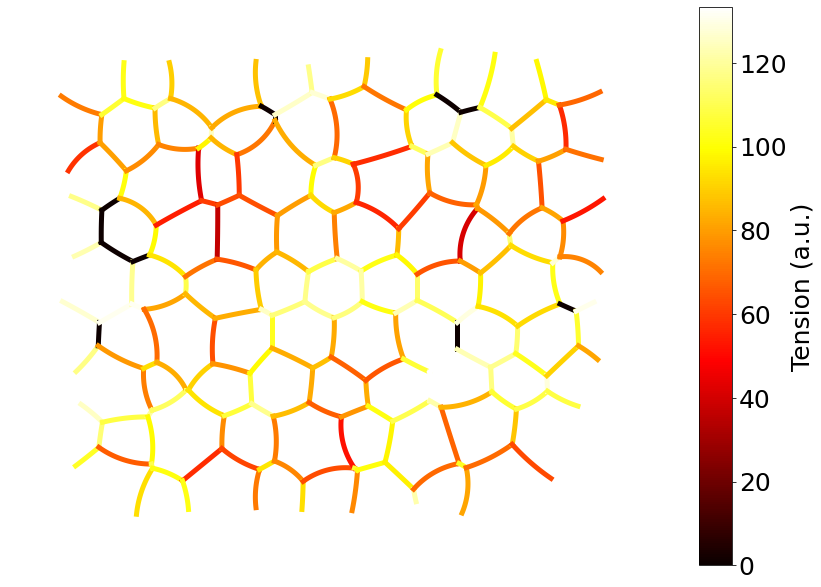

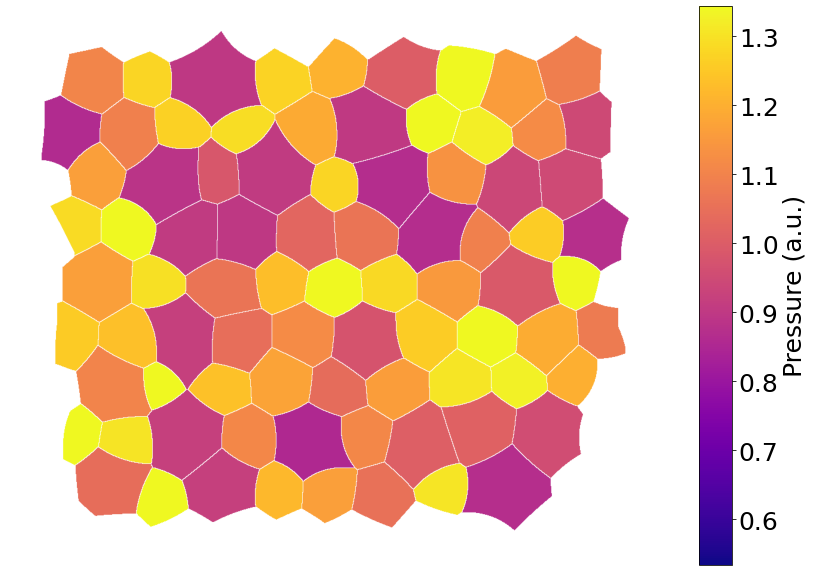

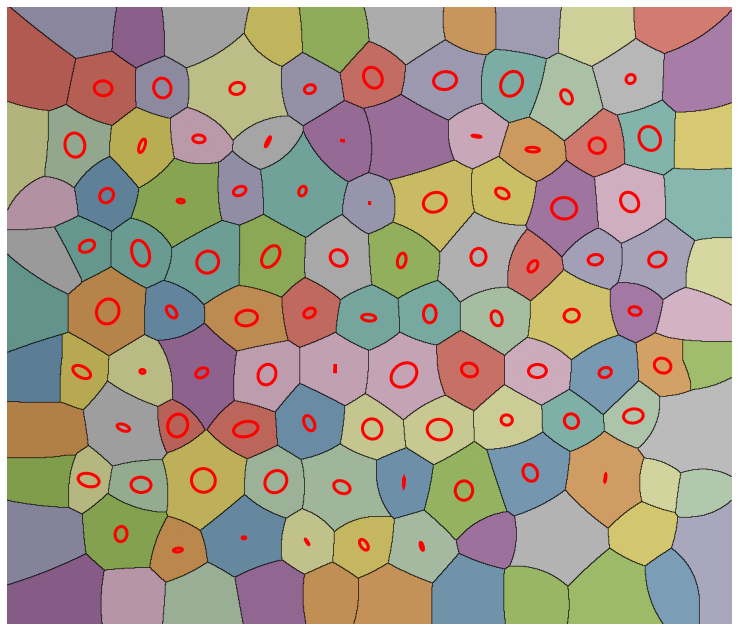

In [4]:
# Plot everything
vmsi_model.plot(['tension','pressure', 'stress'], img, line_thickness=5)

# Plot tensions only
vmsi_model.plot(['tension'],  line_thickness=5, size=25)

# Plot pressures only
vmsi_model.plot(['pressure'],  img, size=25)

# Plot stress tensor only
vmsi_model.plot(['stress'])


#### Output results for further analysis

We can also use the `output_results()` method to return all morphological and mechanical metrics as a Pandas Dataframe
or .csv file, as well as an adjacency matrix containing tensions at cell-cell junctions.

In [5]:
# Output to csv or pandas dataframe
results, neighbours = vmsi_model.output_results(neighbours=True)
results

,pressure,perimeter,feret_d,area,centroid_x,centroid_y,stresstensor_eigval1,stresstensor_eigval2,stresstensor_orientation,stresstensor_anisotropy,inertiatensor_eigval1,inertiatensor_eigval2,inertiatensor_orientation,inertiatensor_anisotropy,moments_hu_1,moments_hu_3,bbox_x,bbox_y
cell_1,0.612986,460.776695,156.284996,12058,604.490546,200.404711,0.020006,0.012728,0.516504,0.222344,1089.209746,922.073255,0.317022,0.083099,0.166801,0.000427,136,129
cell_2,1.086298,363.161472,121.41252,8376,507.587034,202.408071,0.046159,0.037487,0.397672,0.103673,847.942097,562.241973,1.163965,0.202598,0.168360,0.000517,103,121
cell_3,1.468488,308.735065,99.463561,6334,710.652037,195.671140,0.064986,0.055608,0.085216,0.077763,561.842530,459.518549,1.034352,0.100184,0.161251,0.000039,90,98
cell_4,0.926124,349.747258,120.149906,8137,203.874155,210.195527,0.034618,0.030416,1.432806,0.064611,753.635305,570.833793,1.497308,0.138019,0.162771,0.000062,97,120
cell_5,1.222076,295.764502,104.656581,5886,290.029222,199.690962,0.066859,0.043064,0.992534,0.216474,624.082883,366.137951,0.516345,0.260492,0.168233,0.000303,94,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_79,1.137714,293.764502,98.183502,5848,453.909200,810.404583,0.025329,0.010661,0.126411,0.407547,534.871431,412.279996,1.369863,0.129432,0.161962,0.000073,79,98
cell_80,0.862754,345.161472,112.004464,7703,627.730495,817.084902,0.025972,0.014273,0.961330,0.290683,697.721148,557.981952,0.799703,0.111284,0.163015,0.000061,106,109
cell_81,1.284605,292.936075,99.569072,5392,732.084755,808.384829,0.041646,0.024029,0.833403,0.268240,536.872181,379.843091,0.409946,0.171295,0.170014,0.000892,90,86
cell_82,1.389731,300.735065,98.325988,5737,258.275231,822.759108,0.032201,0.013976,0.800310,0.394671,546.311052,403.853755,1.149012,0.149929,0.165620,0.000390,86,98


### Basic further analysis

Further analysis can be performed using the results from morphometrics and force inference. At the most basic level,
we can plot cells in morphology and force space by PCA on the morphometric and mechanical features.

First, plot cells in morphology space:

Text(0, 0.5, 'PC_2')

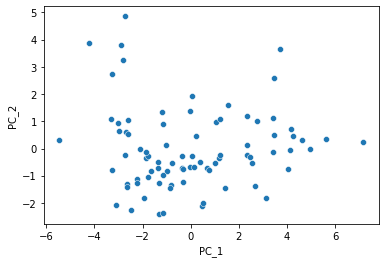

In [6]:
# Extract morphology features
morph_res = results[['perimeter','feret_d','area','inertiatensor_eigval1','inertiatensor_eigval2','inertiatensor_orientation',
                        'inertiatensor_anisotropy','moments_hu_1','moments_hu_3','bbox_x','bbox_y']].to_numpy()

# PCA on morphology results
morph_res_norm = scale(morph_res)
morph_pca = PCA()
morph_pca_res = morph_pca.fit_transform(morph_res_norm)

sns.scatterplot(morph_pca_res[:,0], morph_pca_res[:,1])
plt.xlabel('PC_1')
plt.ylabel('PC_2')

Next, PCA on mechanical space:

Text(0, 0.5, 'PC_2')

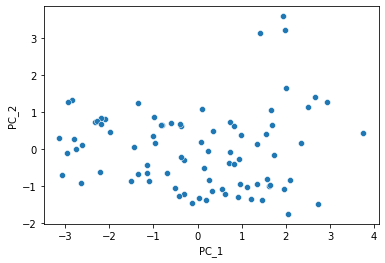

In [7]:
# Extract mechanical features
force_res = results[['pressure','stresstensor_eigval1','stresstensor_eigval2','stresstensor_orientation','stresstensor_anisotropy']].to_numpy()

# PCA on force inference results
force_res_norm = scale(force_res)
force_pca = PCA()
force_pca_res = force_pca.fit_transform(force_res_norm)

# Plot results
sns.scatterplot(force_pca_res[:,0], force_pca_res[:,1])
plt.xlabel('PC_1')
plt.ylabel('PC_2')


### Alternative method: manually run pipeline

The `run_vmsi()` function processes the segmented image, create a VMSI object, and runs force inference and morphometrics
in a single step. Each step can also be run individually.

First, load the segmented image.

In [8]:
# Read image
img = skimage.io.imread(f'{curr_wd}/../example_data/synthetic/test.tiff')

The segmented image is processed by creating a `Segmenter` containing the image.
The `process_segmented_image()` method is then used to process the image; this creates a `seg_obj` containing
information on cells, cell-cell junctions, and cell-cell vertices required for force inference.

During segmentation, morphometric features are also measured and stored in the `seg_obj` for each cell.

In [9]:
seg = Segmenter(masks=img, labelled=True)
seg_obj, labelled_mask = seg.process_segmented_image()

The vertex, junction and cell information is extracted and used to create a VMSI model.

In [10]:
V_df = seg_obj.V_df
C_df = seg_obj.C_df
E_df = seg_obj.E_df

# create the model
vmsi_model = VMSI(vertices=V_df, cells=C_df, edges=E_df, height=img.shape[0], width=img.shape[1], verbose=False)

The model is then fit according to the scheme described in *Noll et al., 2020*.

In [11]:
# fit the model parameters
vmsi_model.fit()

Model fitting determines pressures for each cell and tensions for each cell-cell junction; a separate function is used
to compute the cell stress tensor from these values.

In [12]:
# compute stress tensor
vmsi_model.compute_stresstensor()

After this, the results of the inference can be plotted and output as usual.

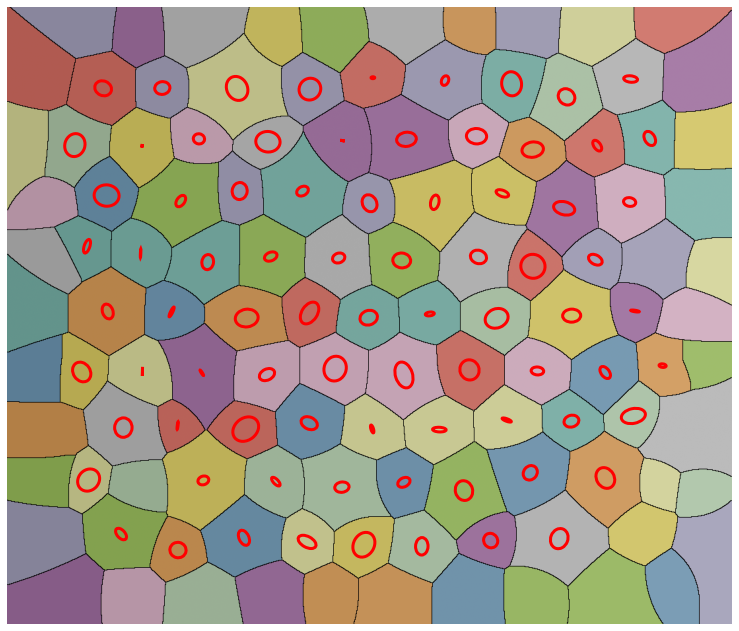

In [13]:
# plot results
vmsi_model.plot(['stress'], img)